<a href="https://colab.research.google.com/github/Manish442kumar/proj1/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
cd /content/drive/My Drive/regressiondataset

/content/drive/My Drive/regressiondataset


In [0]:
import pandas as pd

In [0]:
wdata=pd.read_csv("Weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
wdata.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
wdata.shape

(119040, 31)

In [0]:
import matplotlib.pyplot as plt

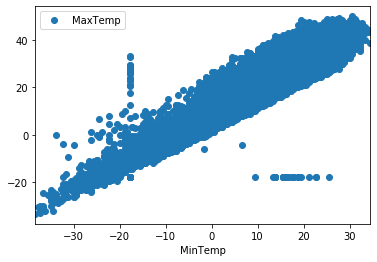

In [0]:
wdata.plot(x='MinTemp',y='MaxTemp',style='o')

In [0]:
temp_max=wdata["MaxTemp"]

In [0]:
temp_min=wdata["MinTemp"]

In [0]:
temp_max

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [0]:
temp_min

0         22.222222
1         21.666667
2         22.222222
3         22.222222
4         21.666667
            ...    
119035    18.333333
119036    18.333333
119037    18.333333
119038    18.333333
119039    17.222222
Name: MinTemp, Length: 119040, dtype: float64

In [0]:
temp_max.shape

(119040,)

In [0]:
temp_min.shape

(119040,)

In [0]:
import numpy as np

In [0]:
temp_max_array=np.asarray(temp_max)

In [0]:
temp_max_array

array([25.55555556, 28.88888889, 26.11111111, ..., 28.33333333,
       28.33333333, 29.44444444])

In [0]:
temp_min_array=np.asarray(temp_min)

In [0]:
temp_min_array.shape

(119040,)

In [0]:
temp_max_array.shape

(119040,)

In [0]:
temp_max_array=temp_max_array.reshape(-1,1)

In [0]:
temp_max_array.shape

(119040, 1)

In [0]:
temp_min_array=temp_min_array.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(temp_min_array,temp_max_array,test_size=0.3,random_state=42)

In [0]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(83328, 1) (35712, 1) (83328, 1) (35712, 1)


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regr=LinearRegression()

In [0]:
#training with training data
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regr.coef_

array([[0.91895795]])

In [0]:
regr.intercept_

array([10.68834666])

In [0]:
y_pred=regr.predict(x_test)

In [0]:
predicted_df=pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})

In [0]:
predicted_df

,Actual,predicted
0,30.000000,27.535909
1,28.888889,30.088570
2,28.333333,30.088570
3,33.333333,35.193892
4,38.888889,35.704424
...,...,...
35707,21.666667,19.877926
35708,27.222222,28.556973
35709,33.888889,33.151763
35710,-12.777778,-8.201345


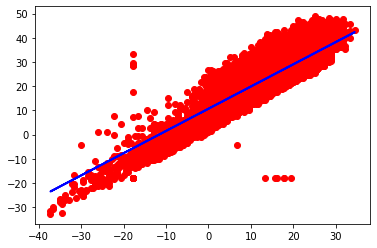

In [0]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue',linewidth=2)
plt.show()

In [0]:
from sklearn import metrics

In [0]:
print("absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean absolute error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

absolute error: 3.1849299993553064
Mean squared error: 17.249541919139908
absolute error: 1.7846372178555805
